<a href="https://colab.research.google.com/github/SingamSaiVaraPrasad/my_projects/blob/main/Telecom_churn_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df=pd.read_csv('/content/telecom_churn.csv')
df.shape

(243553, 14)

In [153]:
df[df.isnull().any(axis=1)]

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn


In [154]:
df.dropna(inplace=True)
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


0

In [155]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [156]:
df.shape
df['churn'].value_counts()
df['telecom_partner'].value_counts()

telecom_partner
Reliance Jio    61123
Airtel          60905
Vodafone        60802
BSNL            60723
Name: count, dtype: int64

In [157]:
df.drop('customer_id',axis=1)
df.telecom_partner.unique()

array(['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel'], dtype=object)

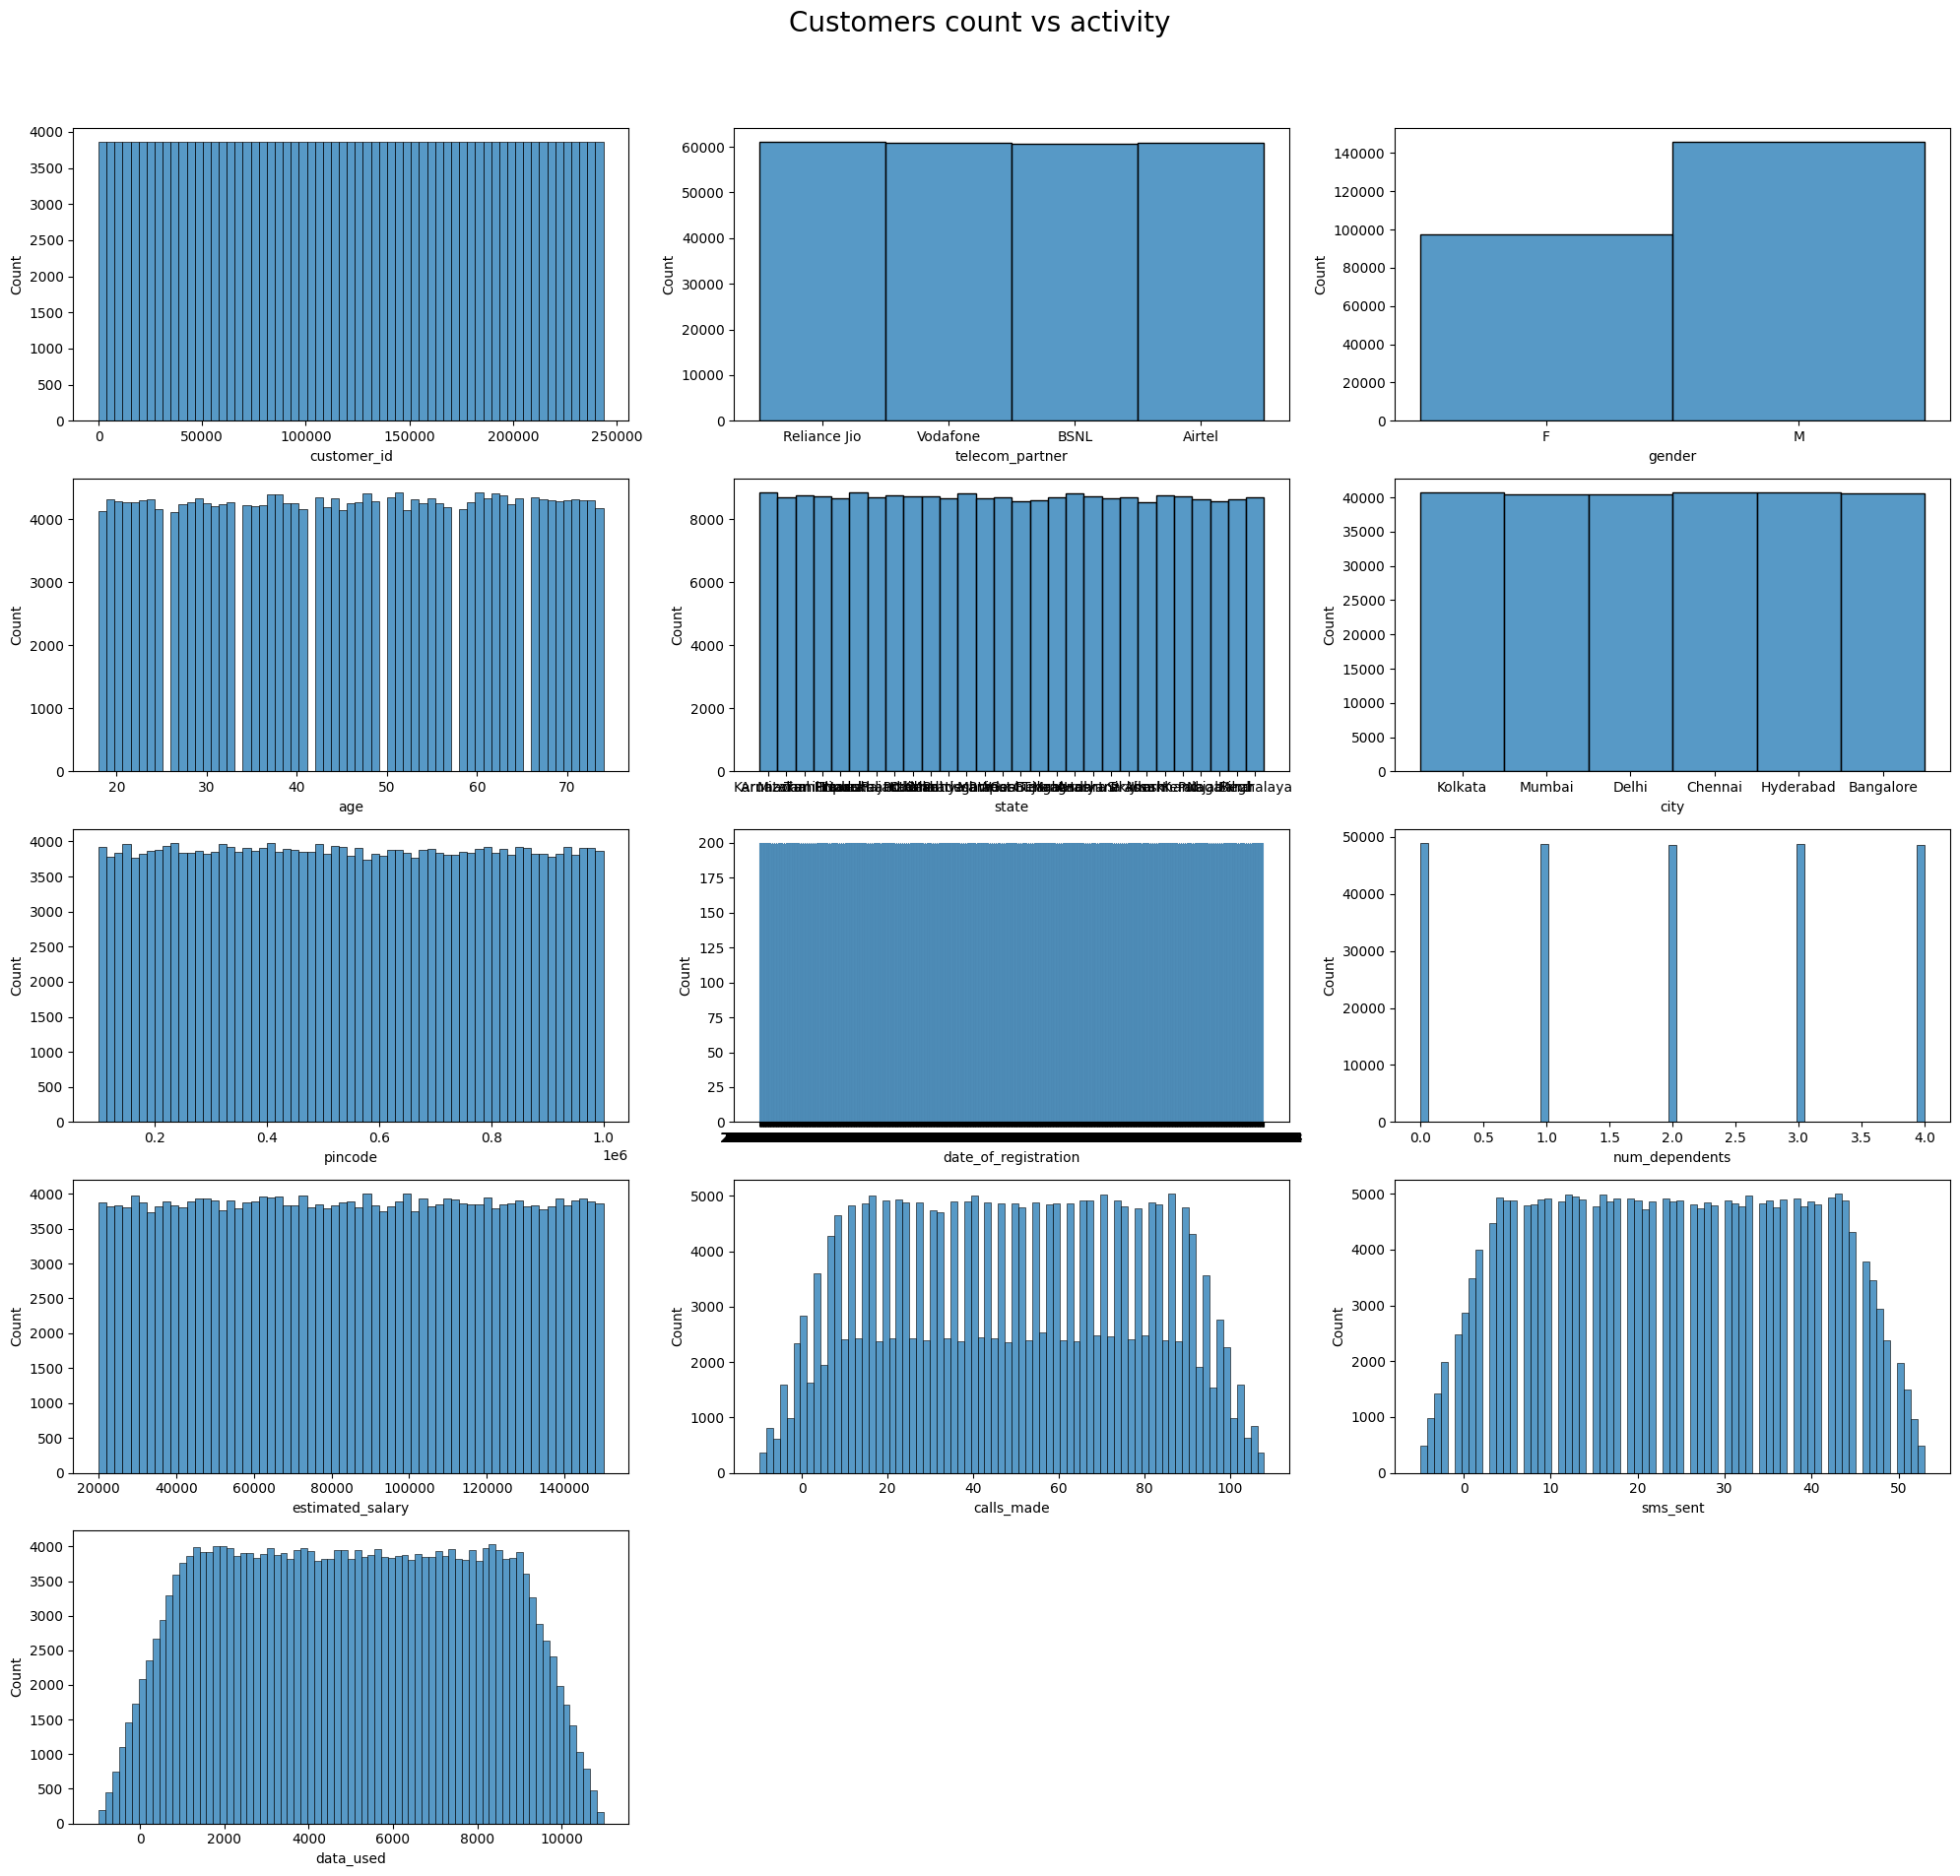

In [158]:
i=1
fig=plt.figure(figsize=(20,20))
fig.suptitle('Customers count vs activity', fontsize=20)
for cols in df.columns[:-1]:
  plt.subplot(5,3,i)
  sns.histplot(df[cols])
  i=i+1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

In [159]:
churn_comp=df[df['churn']==1]['telecom_partner']
non_churn_comp=df[df['churn']==0]['telecom_partner']

In [160]:
non_churn_comp

0         Reliance Jio
1         Reliance Jio
4                 BSNL
5             Vodafone
6                 BSNL
              ...     
243548          Airtel
243549    Reliance Jio
243550    Reliance Jio
243551            BSNL
243552            BSNL
Name: telecom_partner, Length: 194726, dtype: object

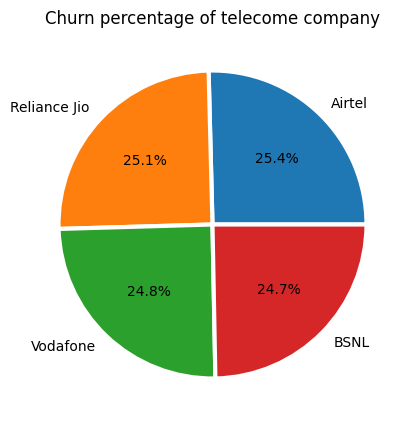

In [161]:
company_names=list(churn_comp.value_counts().keys())
plt.figure(figsize=(10,5))
company_cnt=churn_comp.value_counts()
plt.pie(company_cnt,labels=company_names,autopct='%.1f%%',wedgeprops={'linewidth':3,'edgecolor':'white'})
plt.title("Churn percentage of telecome company")
plt.show()

In [162]:
churn_gender=df[df['churn']==1]['gender']
gender_values=list(churn_gender.value_counts())
gender_names=['male','female']


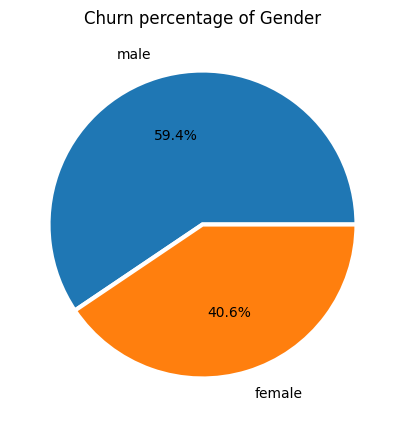

In [163]:
plt.figure(figsize=(10,5))
plt.pie(

gender_values,
autopct='%.1f%%',
labels=gender_names,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of Gender")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

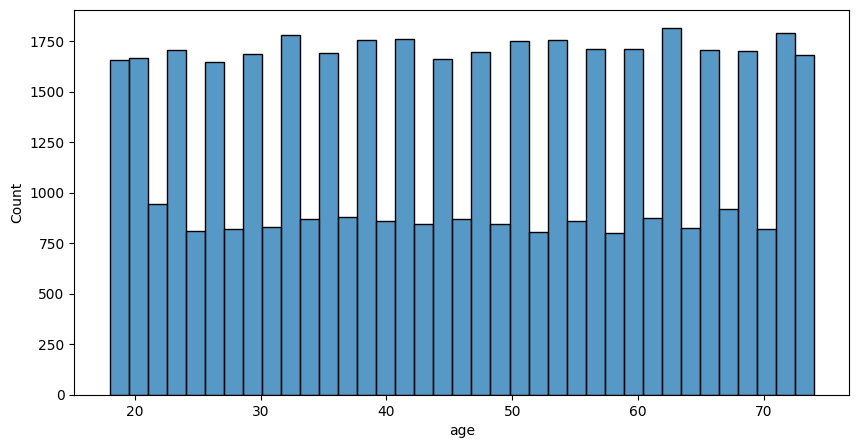

In [164]:
churn_age=df[df['churn']==1]['age']
nchurn_age=df[df['churn']==0]['age']
plt.figure(figsize=(10,5))
sns.histplot(churn_age)

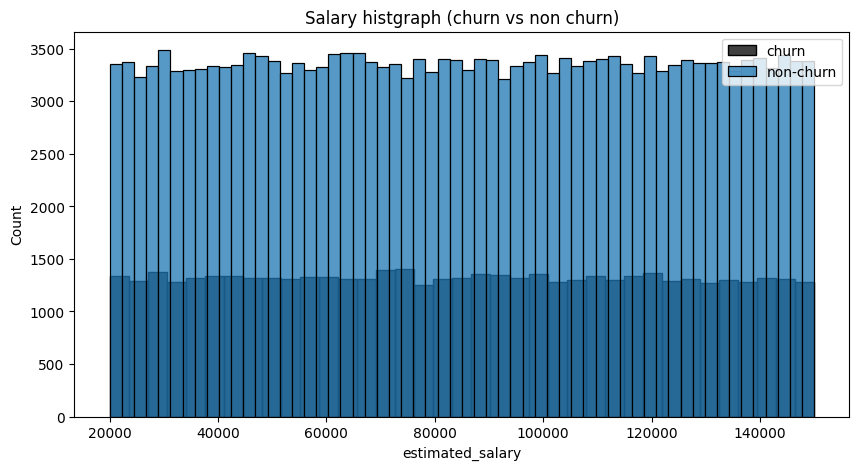

In [165]:
churn_salary=df[df['churn']==1]['estimated_salary']
nonchurn_salary=df[df['churn']==0]['estimated_salary']

plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black")
sns.histplot(nonchurn_salary,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()


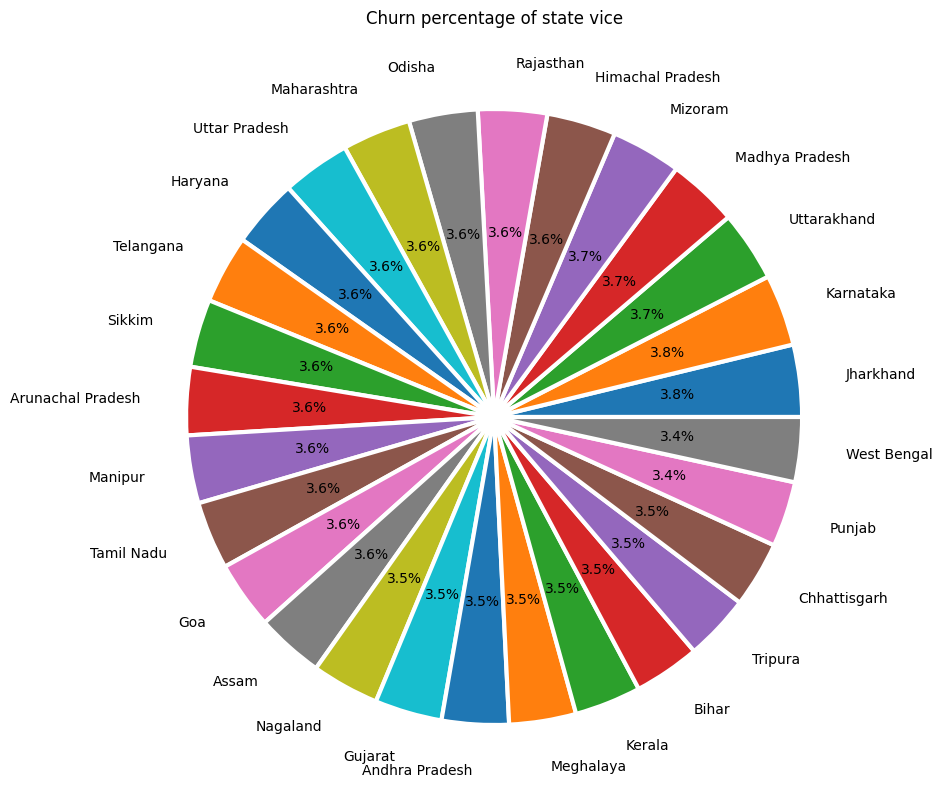

In [166]:
churn_data_state=df[df['churn']==1]['state']
non_churn_data_state=df[df['churn']==0]['state']

churn_value_state=list(churn_data_state.value_counts())
churn_value_state_keys=list(churn_data_state.value_counts().keys())

plt.figure(figsize=(20,10))
plt.pie(

churn_value_state,
autopct='%.1f%%',
labels=churn_value_state_keys,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of state vice")
plt.show()

Text(0.5, 1.0, 'Histplot calls made churn customer')

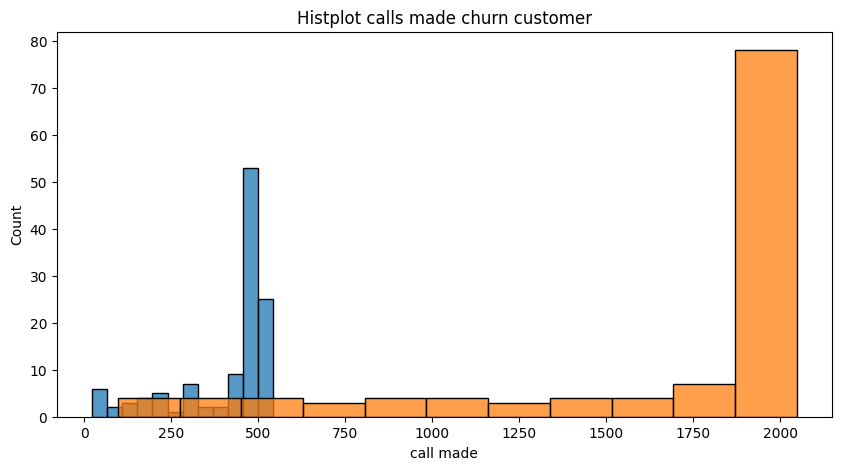

In [167]:
churn_data_calls_made=df[df['churn']==1]['calls_made']
non_churn_calls_made=df[df['churn']==0]['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

plt.figure(figsize=(10,5))
sns.histplot(churn_value_calls_made)
sns.histplot(non_churn_value_calls_made)
plt.xlabel("call made")
plt.title("Histplot calls made churn customer")

Text(0.5, 1.0, 'scatterplot data usage made churn  and non-churn customer')

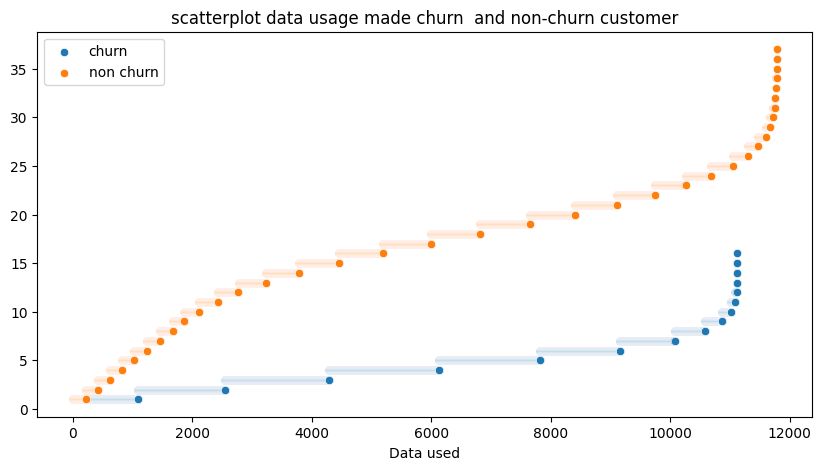

In [168]:
churn_data_data_used=df[df['churn']==1]['data_used']
non_churn_data_used=df[df['churn']==0]['data_used']
churn_value_calls_made=list(churn_data_data_used.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_data_used.value_counts().sort_values())
plt.figure(figsize=(10,5))
sns.scatterplot(churn_value_calls_made,label="churn")
sns.scatterplot(non_churn_value_calls_made,label="non churn")
plt.xlabel("Data used")
plt.title("scatterplot data usage made churn  and non-churn customer")

In [169]:
df.drop('customer_id',axis=1,inplace=True)

<Axes: >

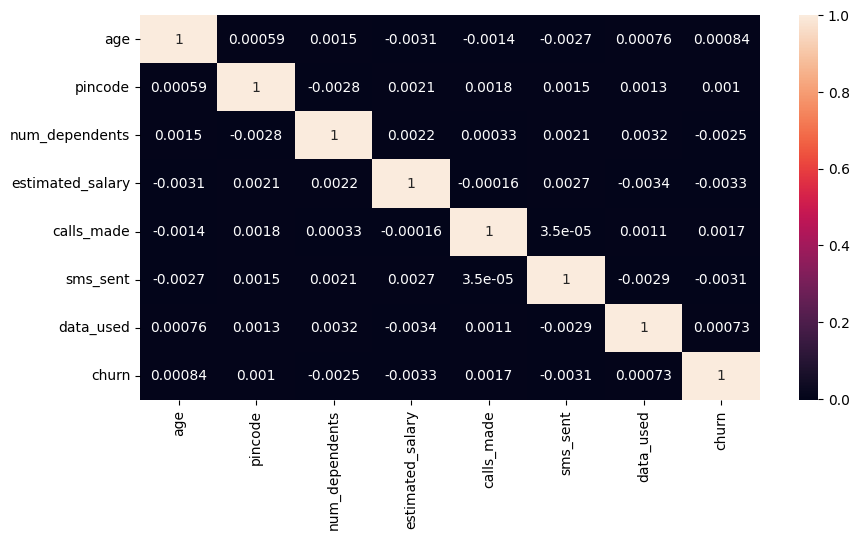

In [177]:
non_numeric_cols=df.select_dtypes(exclude=['number']).columns
non_numeric_cols
numeric=df.drop(columns=non_numeric_cols)
numeric
plt.figure(figsize=(10,5))
sns.heatmap(numeric.corr(),annot=True)

In [182]:
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()
for col in df.columns:
  if(df[col].dtype=='object'):
    df[col]=encod.fit_transform(df[col])
df

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,0,0,28,16,4,110295,1218,3,130580,28,9,4102,0
243549,2,0,52,2,4,713481,1218,0,82393,80,45,7521,0
243550,2,1,59,24,4,520218,1218,4,51298,26,4,6547,0
243551,1,1,49,12,4,387744,1218,2,83981,80,15,1125,0


In [222]:
from sklearn.model_selection import train_test_split
x=df.drop('churn',axis=1)
y=df['churn']
xtr,xtst,ytr,ytst=train_test_split(x,y,train_size=0.4,random_state=1)


In [223]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(xtr,ytr)
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
x_train1=pd.DataFrame(model.fit_transform(x_train1),columns=xtr.columns)
x_test=pd.DataFrame(model.transform(xtst),columns=xtst.columns)

In [224]:
x_train1.shape

(155700, 12)

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score
classifier7 = LogisticRegression()
classifier7.fit(x_train1,y_train1)
print("accuracy without smoting",classifier7.score(xtst,ytst))

accuracy without smoting 0.2973065447677442


In [226]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(xtr,ytr)

print("accuracy without smoting",classifier.score(xtst,ytst))

accuracy without smoting 0.7997974434073304


In [227]:
y_pred7 = classifier7.predict(xtst)


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(ytst, y_pred7)
print(cm7)


[[18915 97961]
 [ 4725 24531]]


accuracy without smoting 0.2973065447677442


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

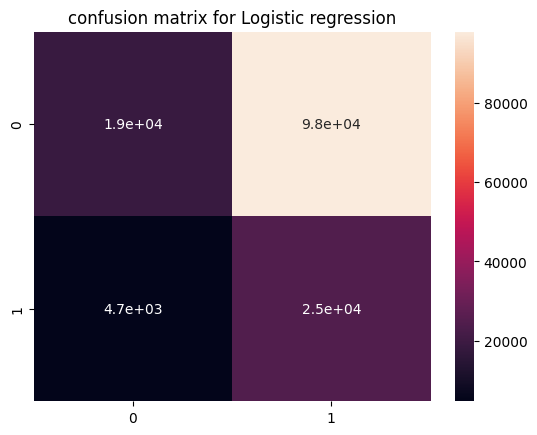

In [228]:
print("accuracy without smoting",classifier7.score(xtst,ytst))
cn=confusion_matrix(ytst,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(xtst,ytst)
#Predict the response for test dataset
y_pred = clf.predict(xtst)
print("smoting data score in svm",clf.score(xtst,ytst))

smoting data score in svm 1.0


In [230]:
# Create Decision Tree classifer object
clfd = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfd = clf.fit(xtr,ytr)

#Predict the response for test dataset
y_pred = clfd.predict(xtst)
print("score on non smoting data",clfd.score(xtst,ytst))

score on non smoting data 0.6628390769988777


Text(0.5, 1.0, 'confusion matrix for Decision tree classifier')

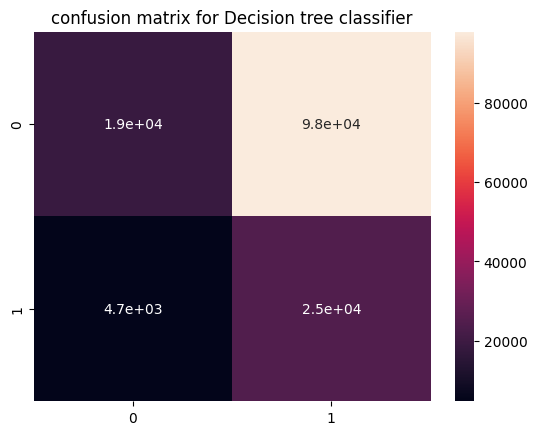

In [231]:
cn=confusion_matrix(ytst,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Decision tree classifier")

In [232]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(x_train1, y_train1)
classifier_rf.score(xtst,ytst)

0.7997974434073304

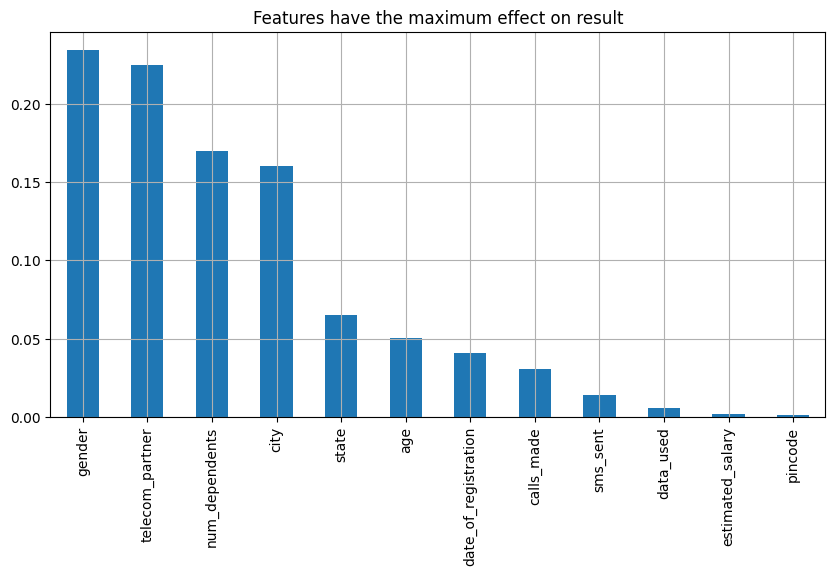

In [233]:
#Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(classifier_rf.feature_importances_, index=x_train1.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
# Plot a simple bar chart
feature_importances.plot.bar();
plt.grid()
plt.title("Features have the maximum effect on result")
plt.show()

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train1, y_train1)
lf.score(xtst,ytst)
y_pred = lf.predict(x_test)

Text(0.5, 1.0, 'confusion matrix for gradient boosting  classifier')

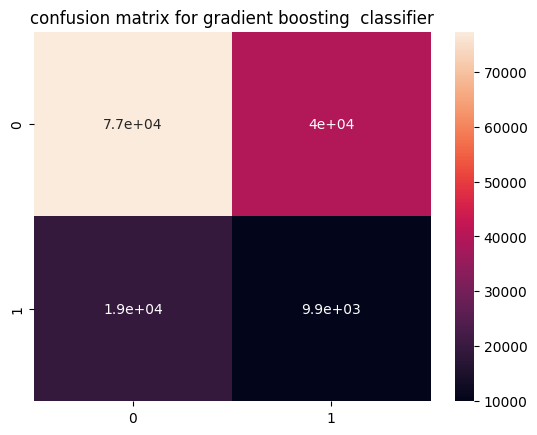

In [235]:
cn=confusion_matrix(ytst,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boosting  classifier")

In [236]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(xtr,ytr)
print("score on non smoting data",lf.score(xtst,ytst))

score on non smoting data 0.7997632277666767
